In [1]:
# import sys
# sys.path.append("/home/michael/pycharm/pycharm-2019.2.3/debug-eggs/pydevd-pycharm.egg")
# 
# import pydevd_pycharm
# pydevd_pycharm.settrace('192.168.1.200', port=2222, stdoutToServer=True, stderrToServer=True)

import sys
sys.path.append('/home/michael/jupyter/local-packages')

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Matplotlib Financial Plotting 
import mplfinance as mpf

from plotEarnings import getEarningsData 

# Starting Monday of earnings week
startday = '2020-01-06'

#Get weekly earnings
theEarningsDataList =  getEarningsData.getWeeklyExcelSummary(startday, 'PSMT')

    #returnList = [earnings1DayMove_np, earnings4DayMove_np, earningsMdate_np, earnings1DayCandlestick]
    
earnings1DayMove_np = theEarningsDataList[0]
earnings4DayMove_np = theEarningsDataList[1]
earningsMdate_np = theEarningsDataList[2]
earnings1DayCandlestick  = theEarningsDataList[3]

# mpf.plot(earnings1DayCandlestick)

in getWeeklyExcelSummary


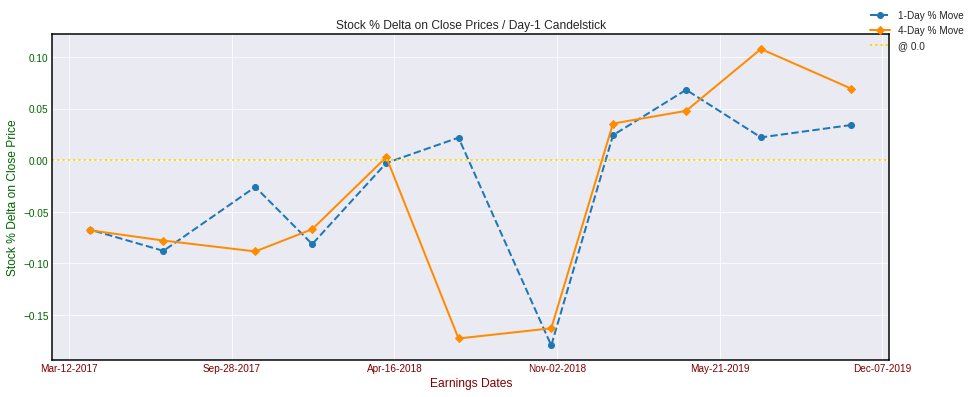

In [4]:

#=============================================================================================
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
formatter.formats = ["%b-%d-%Y"]

# X Axes setup
xLabelColor = 'maroon'
xLabel = 'Earnings Dates'

# Y1 Setup
y1_LegendLabel1Day = "1-Day % Move"
y1_LegendLabel4Day = "4-Day % Move"
y1_LabelColor =  'darkgreen'
y1_Label = 'Stock % Delta on Close Price'
y1_color1DayStockMove = 'tab:blue'
y1_color4DayStockMove = 'darkorange'

# Zero Line 
zeroPointLabel = '@ 0.0'

# Y2 Setup
y2_LegendLabel = "1-Day $ Move"
y2_LabelColor =  'g'
y2_Label = '1-Day $ Move'
#  Y2 Setup
y2Label =  'Stock $ Move on 1-Day'

fig, ax1 = plt.subplots(figsize=(15,6))

# single Plot
# theStock = excelPastEarningsDateDF.iloc[0,0]

# Title    
ax1.set_title('Stock % Delta on Close Prices / Day-1 Candelstick')

# Set up X and Y1 Labels and Ticks
ax1.set_xlabel(xLabel, color=xLabelColor)
ax1.set_ylabel(y1_Label, color=y1_LabelColor)
ax1.tick_params(axis='y', labelcolor=y1_LabelColor)
ax1.tick_params(axis='x', labelcolor=xLabelColor)

# Y1 Date format setup
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b-%d-%Y"))

# Plot Y1 
ax1.plot(earningsMdate_np, earnings1DayMove_np, color=y1_color1DayStockMove, 
         label=y1_LegendLabel1Day,  linestyle='--', marker='o' )
ax1.plot(earningsMdate_np, earnings4DayMove_np, color=y1_color4DayStockMove, 
         label=y1_LegendLabel4Day,  linestyle='-', marker='D' )
plt.axhline(y=0,color='gold',linestyle=':', label=zeroPointLabel)

# Y2 setup
# instantiate a second axes that shares the same x-axis
# ax2 = ax1.twinx()/
# ax2.plot(earningDateString, excelPastEarningsDateDF.EDFwd4DayClosePercentDelta[earn], color=color4DayStockMove, label=ax2LegendLabel)
# ax2.tick_params(axis='y', labelcolor=color4DayStockMove)

#build Legend for 2 Xaxis
lines1, labels1 = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1.1, 1.1))

# fig.autofmt_xdate()
# plt.show()

In [3]:

    #build Legend for 2 Xaxis
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, bbox_to_anchor=(1.0, 1.1))